# Mask property - synthetic dataset SYN1

In [68]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [69]:
pal = sns.color_palette("Paired", 12)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10], "pgexplainer": pal[11]}


In [70]:
sns.set_context("notebook", rc={"legend.fontsize":20, "legend.title_fontsize":20, 
                                "axes.titlesize":19,"axes.labelsize":17,
                               "xtick.labelsize" : 16, "ytick.labelsize" : 16})


In [71]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/syn/topk'

jsonpath = f'/cluster/home/kamara/Explain/configs/syn/topk/config_syn_topk_cc.json'
ranges = get_param_ranges(jsonpath)

df_res = pd.read_csv(os.path.join(dir, f'nc_syn_topk_mask_properties.csv'), index_col = 0)
res = df_res.groupby(by=['dataset', 'topk', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()

In [72]:
def explainer_type(row):
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx', 'pgexplainer'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

df_res['type'] = df_res.apply(lambda row: explainer_type(row), axis=1)

In [73]:
df_res["1-fidelity_acc-"] = 1- df_res["fidelity_acc-"]
df_res["1-fidelity_prob-"] = 1- df_res["fidelity_prob-"]
df_res['charact_prob'] = 2 * df_res['fidelity_prob+'] * (1-df_res['fidelity_prob-'])/ (df_res['fidelity_prob+']  + 1-df_res['fidelity_prob-'])
df_res['charact_acc'] = 2 * df_res['fidelity_acc+'] * (1-df_res['fidelity_acc-'])/ (df_res['fidelity_acc+']  + 1-df_res['fidelity_acc-'])


In [74]:
df_res["1-fidelity_gnn_acc-"] = 1- df_res["fidelity_gnn_acc-"]
df_res["1-fidelity_gnn_prob-"] = 1- df_res["fidelity_gnn_prob-"]
df_res['charact_gnn_prob'] = 2 * df_res['fidelity_gnn_prob+'] * (1-df_res['fidelity_gnn_prob-'])/ (df_res['fidelity_gnn_prob+']  + 1-df_res['fidelity_gnn_prob-'])
df_res['charact_gnn_acc'] = 2 * df_res['fidelity_gnn_acc+'] * (1-df_res['fidelity_gnn_acc-'])/ (df_res['fidelity_gnn_acc+']  + 1-df_res['fidelity_gnn_acc-'])


In [75]:
df_res = df_res.reset_index()
df_res

,dataset,true_label_as_target,hard_mask,topk,explainer_name,num_test,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,...,number_of_edges,type,1-fidelity_acc-,1-fidelity_prob-,charact_prob,charact_acc,1-fidelity_gnn_acc-,1-fidelity_gnn_prob-,charact_gnn_prob,charact_gnn_acc
0,syn1,True,True,1.0,basic_gnnexplainer,20.0,0.05,0.55,0.021082,0.434927,...,4110.0,pertubation,0.45,0.565073,0.040647,0.090000,2.0,2.0,-4.0,-4.0
1,syn1,True,True,1.0,distance,20.0,0.10,0.55,-0.024823,0.450872,...,4110.0,baseline,0.45,0.549128,-0.051996,0.163636,2.0,2.0,-4.0,-4.0
2,syn1,True,True,1.0,gnnexplainer,20.0,0.05,0.55,-0.004908,0.450872,...,4110.0,pertubation,0.45,0.549128,-0.009905,0.090000,2.0,2.0,-4.0,-4.0
3,syn1,True,True,1.0,ig,20.0,0.10,0.55,0.002297,0.459073,...,4110.0,gradient,0.45,0.540927,0.004576,0.163636,2.0,2.0,-4.0,-4.0
4,syn1,True,True,1.0,occlusion,20.0,0.45,0.55,0.326566,0.447400,...,4110.0,pertubation,0.45,0.552600,0.410526,0.450000,2.0,2.0,-4.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,syn1,True,True,100.0,pgexplainer,20.0,0.25,0.55,0.122988,0.409935,...,4110.0,pertubation,0.45,0.590065,0.203550,0.321429,2.0,2.0,-4.0,-4.0
161,syn1,True,True,100.0,pgmexplainer,20.0,0.45,0.15,0.363850,0.146160,...,4110.0,pertubation,0.85,0.853840,0.510261,0.588462,2.0,2.0,-4.0,-4.0
162,syn1,True,True,100.0,random,20.0,0.05,0.55,0.006008,0.450486,...,4110.0,baseline,0.45,0.549514,0.011887,0.090000,2.0,2.0,-4.0,-4.0
163,syn1,True,True,100.0,sa,20.0,0.55,0.55,0.354240,0.455535,...,4110.0,gradient,0.45,0.544465,0.429220,0.495000,2.0,2.0,-4.0,-4.0


In [76]:
df_res.columns

Index(['dataset', 'true_label_as_target', 'hard_mask', 'topk',
       'explainer_name', 'num_test', 'fidelity_acc+', 'fidelity_acc-',
       'fidelity_prob+', 'fidelity_prob-', 'fidelity_gnn_acc+',
       'fidelity_gnn_acc-', 'fidelity_gnn_prob+', 'fidelity_gnn_prob-',
       'f1_score', 'precision', 'recall', 'mask_size_init',
       'mask_entropy_init', 'max_avg_init', 'cc_ratio_init',
       'mask_size_transf', 'mask_entropy_transf', 'max_avg_transf',
       'cc_ratio_transf', 'time', 'number_of_edges', 'type', '1-fidelity_acc-',
       '1-fidelity_prob-', 'charact_prob', 'charact_acc',
       '1-fidelity_gnn_acc-', '1-fidelity_gnn_prob-', 'charact_gnn_prob',
       'charact_gnn_acc'],
      dtype='object')

## Mask Analysis: Avg on all topk

In [78]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

def mean_str(col):
    if is_numeric_dtype(col):
        return col.mean()
    else:
        return col.unique() if col.nunique() == 1 else np.NaN

In [79]:
df_gen = df_res[["explainer_name", "mask_size_transf", "mask_entropy_transf", "max_avg_transf", 'cc_ratio_transf', "f1_score", "charact_acc"]]
df_gen = df_gen.groupby(['explainer_name']).agg(mean_str)
df_gen

,mask_size_transf,mask_entropy_transf,max_avg_transf,cc_ratio_transf,f1_score,charact_acc
explainer_name,,,,,,
basic_gnnexplainer,13.810000,1.887440,0.843117,0.816423,0.312224,0.287029
distance,17.666667,2.083017,0.547668,0.748361,0.554585,0.387920
gnnexplainer,13.810000,1.837499,0.799837,0.824791,0.306077,0.313003
ig,17.666667,2.154976,0.965828,0.938028,0.059057,0.163636
occlusion,17.666667,2.168502,0.940058,0.993933,0.135232,0.567600
pagerank,17.666667,2.023475,0.620467,0.497592,0.595597,0.580279
pgexplainer,17.666667,2.169454,0.966529,0.563699,0.007536,0.084429
pgmexplainer,16.426667,2.128565,0.838073,0.542812,0.419779,0.375388
random,17.666667,2.169615,0.997201,0.999133,0.001992,0.006000


## Mask Analysis: Select topk/size

In [80]:
topk_val = 10

In [81]:
df_gen = df_res[df_res.topk==topk_val]
df_gen = df_gen[["explainer_name", "mask_size_transf", "mask_entropy_transf", "max_avg_transf", 'cc_ratio_transf', "charact_acc"]]
df_gen = df_gen.groupby(['explainer_name']).agg(mean_str)
df_gen

,mask_size_transf,mask_entropy_transf,max_avg_transf,cc_ratio_transf,charact_acc
explainer_name,,,,,
basic_gnnexplainer,10.0,2.168961,0.891730,0.810,0.360000
distance,10.0,2.203496,0.437362,0.625,0.411765
gnnexplainer,10.0,2.130310,0.891120,0.840,0.321429
ig,10.0,2.301593,0.969894,0.935,0.163636
occlusion,10.0,2.301072,0.930954,1.000,0.576000
pagerank,10.0,2.281524,0.601698,0.400,0.682759
pgexplainer,10.0,2.302500,0.969486,0.500,0.090000
pgmexplainer,10.0,2.294032,0.809388,0.460,0.400000
random,10.0,2.302585,0.998540,1.000,0.000000


## Plot property vs topk

In [82]:
df_gen = df_res[["explainer_name", "topk", "mask_size_transf", "mask_entropy_transf", "max_avg_transf", 'cc_ratio_transf', "f1_score", "charact_acc"]]


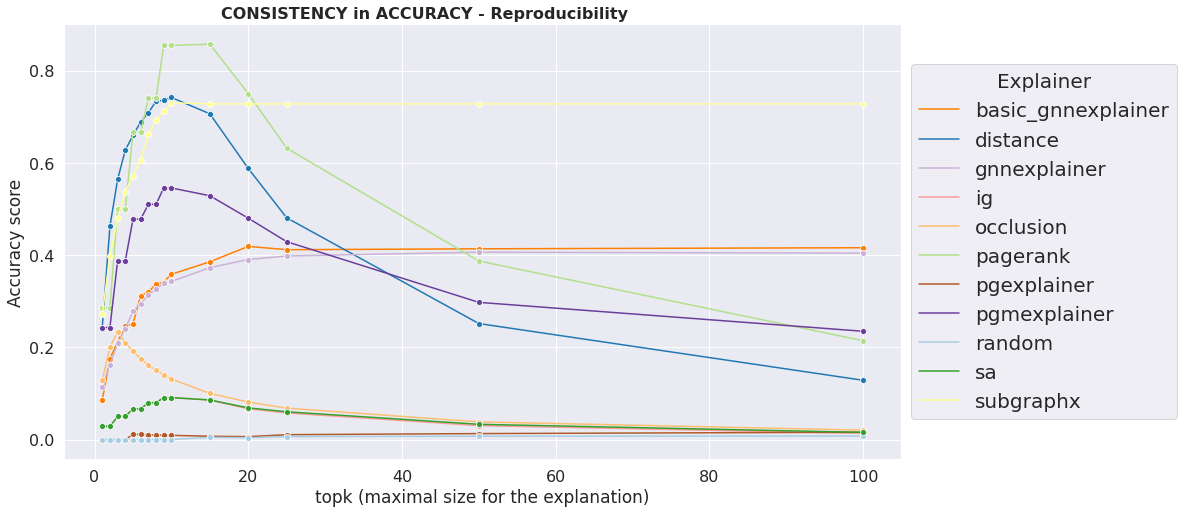

In [83]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_gen, x="topk", y="f1_score",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)

plt.title('CONSISTENCY in ACCURACY - Reproducibility', fontsize=16, weight='bold', x=0.43)
# Put the legend out of the figure
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")

plt.xlabel("topk (maximal size for the explanation)")
plt.ylabel("Accuracy score")
plt.show()

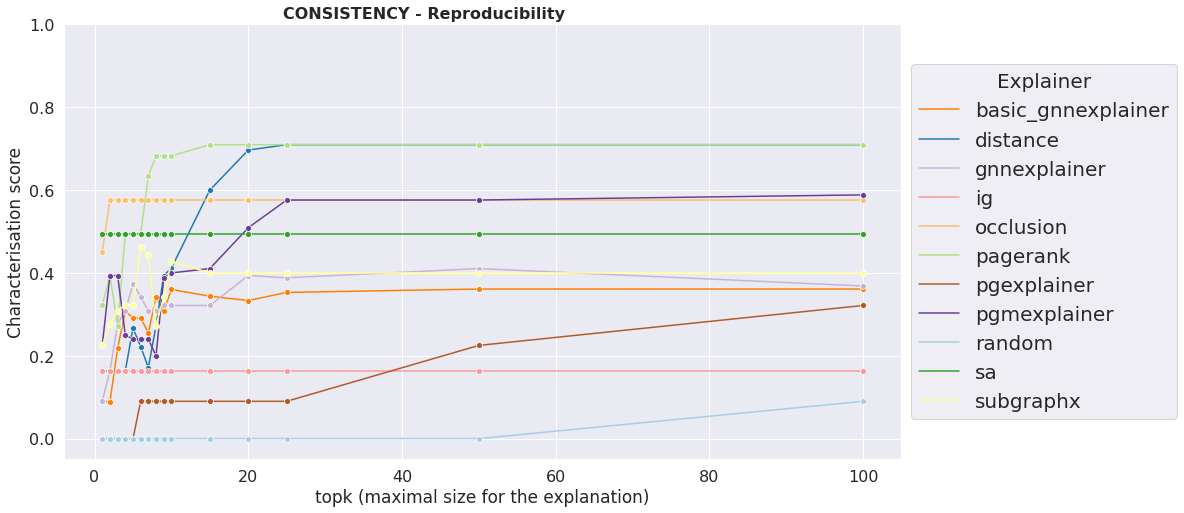

In [84]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_gen, x="topk", y="charact_acc",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)

plt.title('CONSISTENCY - Reproducibility', fontsize=16, weight='bold', x=0.43)
# Put the legend out of the figure
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")

plt.ylim(-0.05,1)
plt.xlabel("topk (maximal size for the explanation)")
plt.ylabel("Characterisation score")
plt.show()

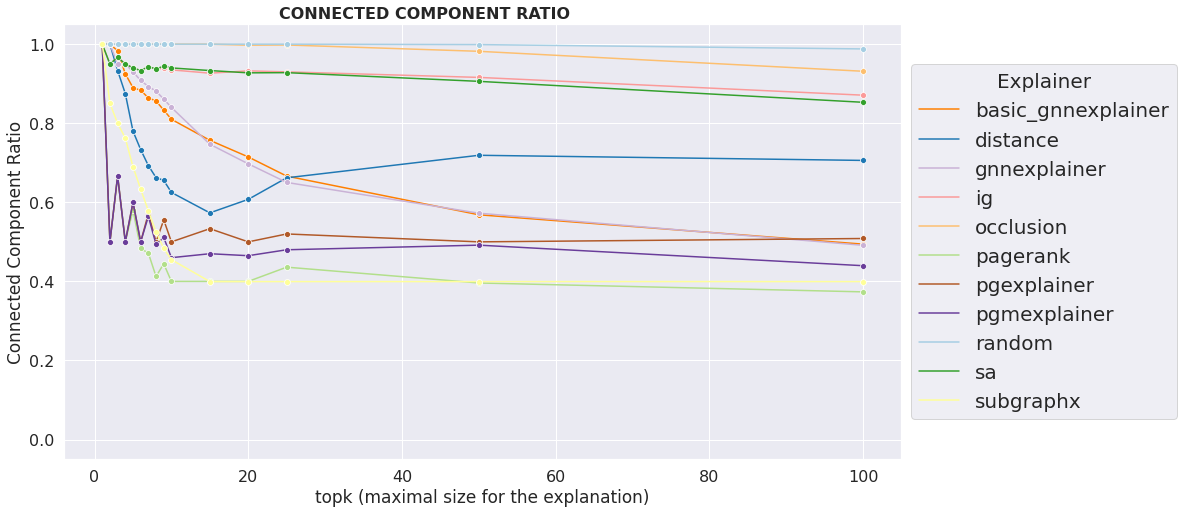

In [85]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_gen, x="topk", y='cc_ratio_transf',
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)

plt.title('CONNECTED COMPONENT RATIO', fontsize=16, weight='bold', x=0.43)
# Put the legend out of the figure
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")

plt.ylim(-0.05,1.05)
plt.xlabel("topk (maximal size for the explanation)")
plt.ylabel("Connected Component Ratio")
plt.show()

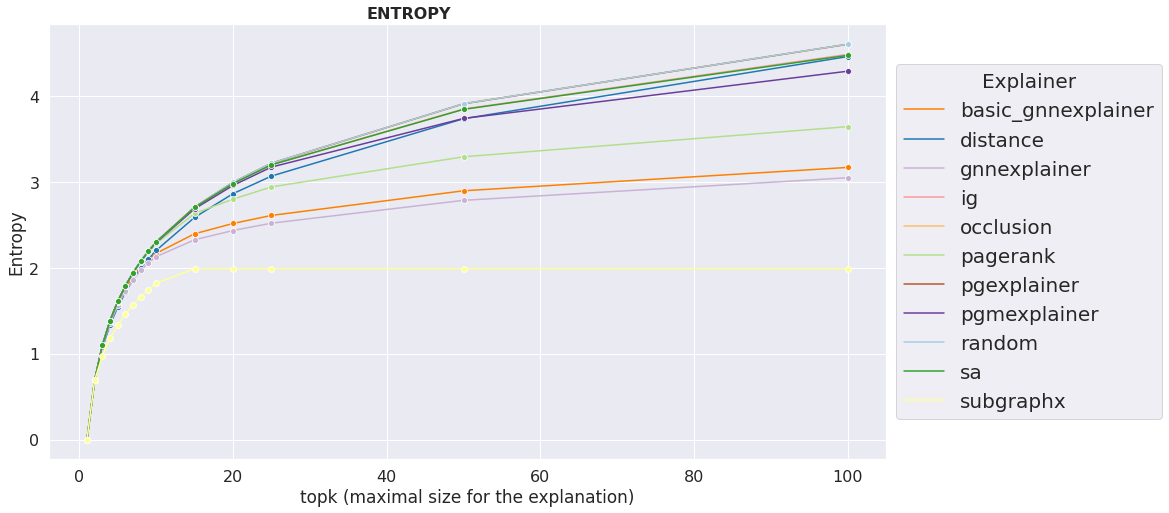

In [63]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_gen, x="topk", y='mask_entropy_transf',
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)

plt.title('ENTROPY', fontsize=16, weight='bold', x=0.43)
# Put the legend out of the figure
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")

plt.xlabel("topk (maximal size for the explanation)")
plt.ylabel("Entropy")
plt.show()

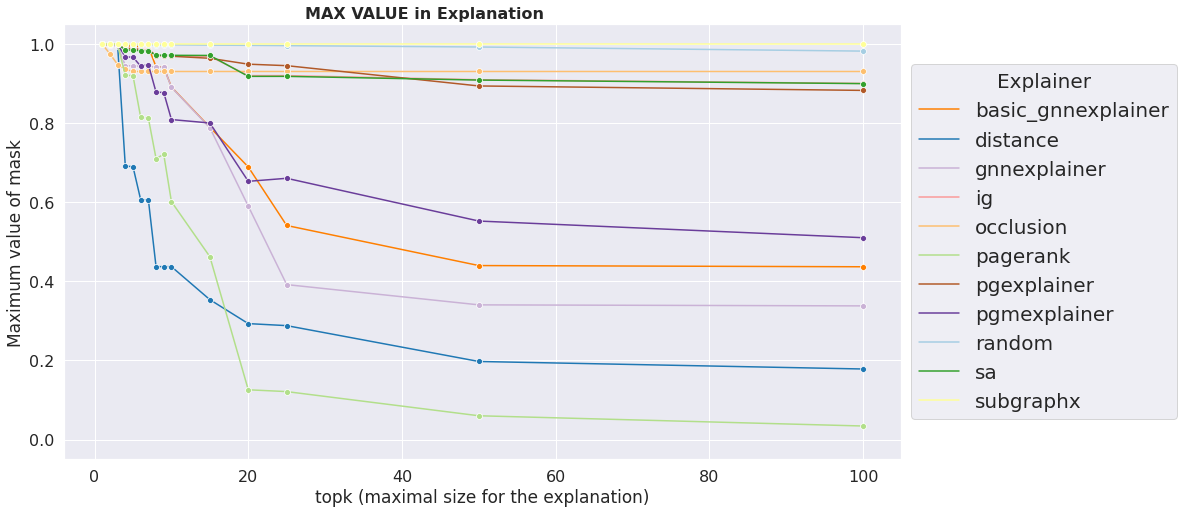

In [46]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_gen, x="topk", y='max_avg_transf',
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)

plt.title('MAX VALUE in Explanation', fontsize=16, weight='bold', x=0.43)
# Put the legend out of the figure
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")

plt.ylim(-0.05,1.05)
plt.xlabel("topk (maximal size for the explanation)")
plt.ylabel("Maximum value of mask")
plt.show()